Importando bibliotecas necessárias

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Pegando os nossos dados

In [84]:
df = pd.read_excel('/content/dados_embedding2 (2).xlsx')

Exibindo os dados

In [85]:
df

,Transcrição,audio_id,Nota Final 2
0,<cliente>:\n Obrigado por assistir!\n E aí E a...,M_01924,45
1,"<cliente>:\n Então, eu falei, nós chegamos até...",M_01816,56
2,<cliente>:\n Mas se tiver os dados daquela emp...,M_02393,100
3,"<atendente>:\n Mais um momento, por favor, que...",M_01441,126
4,<atendente>:\n Mais um momento pra gente lazer...,M_02088,160
...,...,...,...
556,<cliente>:\n Oi.\n</cliente>\n\n<atendente>:\n...,M_03196,876
557,"<atendente>:\n Boa tarde, eu me chamo Thalien,...",M_00704,877
558,<cliente>:\n Alô?\n</cliente>\n\n<atendente>:\...,M_00080,877
559,"<atendente>:\n Boa tarde, como posso ajudar?\n...",M_01715,880


Limpeza:

Remover as tags <atendente> e <cliente> do texto.

Configurar as stopwords (palavras comuns que geralmente são removidas no processamento de linguagem natural) em português.

Converter todo o texto para letras minúsculas.

Remover pontuações e caracteres especiais.

Remover stopwords do texto.

In [86]:
# Remoção das tags
df['Transcrição'] = df['Transcrição'].str.replace(r'</?atendente>', '', regex=True)
df['Transcrição'] = df['Transcrição'].str.replace(r'</?cliente>', '', regex=True)

# Remoção de stopwords, remoção de acentos e texto inteiro em lowercase
nltk.download('stopwords')
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_pt.discard('não')

df['Transcrição'] = df['Transcrição'].str.lower()
df['Transcrição'] = df['Transcrição'].str.replace(r'[^\w\s]', '', regex=True)
df['Transcrição'] = df['Transcrição'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_pt]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reescalar 0 a 0.1 (min max escale)

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 0.1))

# Copiar o DF original
df_temp = df[['Nota Final 2']].copy()

# Adicionar 0 e 1000 ao DF temporário usando pd.concat
df_temp = pd.concat([df_temp, pd.DataFrame({'Nota Final 2': [0, 1000]})], ignore_index=True)

# Aplicar a transformação
df_temp['Nota Final 2'] = scaler.fit_transform(df_temp[['Nota Final 2']])

# Remover as linhas artificiais (0 e 1000)
df_temp = df_temp.iloc[:-2]

# Substituir a coluna original pelo valor reescalonado
df['Nota Final 2'] = df_temp['Nota Final 2'].values

# Exibir as primeiras linhas para verificar o resultado
print(df[['Nota Final 2']].head())


   Nota Final 2
0        0.0045
1        0.0056
2        0.0100
3        0.0126
4        0.0160


In [88]:
df

,Transcrição,audio_id,Nota Final 2
0,obrigado assistir aí aí aí,M_01924,0.0045
1,então falei chegamos torno morte mãe então dis...,M_01816,0.0056
2,dados daquela empresa leandro vinho pra mandar...,M_02393,0.0100
3,momento favor tentando contato valeu não sei n...,M_01441,0.0126
4,momento pra gente lazer tchau tchau momento fa...,M_02088,0.0160
...,...,...,...
556,oi falo dia falo senhora giosiane sim pois não...,M_03196,0.0876
557,boa tarde chamo thalien posso ajudar clube ban...,M_00704,0.0877
558,alô boa tarde obrigado nome yvonne falo nome b...,M_00080,0.0877
559,boa tarde posso ajudar boa tarde patrícia fala...,M_01715,0.0880


# Geração dos embeddings

In [89]:
client = OpenAI(
    api_key=,
)

In [90]:
def get_embedding(text, modelo="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input = [text], model=modelo).data[0].embedding

In [91]:
df['embedding'] = df['Transcrição'].apply(get_embedding)

In [72]:
df

,Transcrição,audio_id,Nota Final 2,embedding
0,obrigado assistir aí aí aí,M_01924,0.000000,"[0.005212496966123581, -0.007158351130783558, ..."
1,então falei chegamos torno morte mãe então dis...,M_01816,0.001317,"[-0.012553036212921143, 0.037131067365407944, ..."
2,dados daquela empresa leandro vinho pra mandar...,M_02393,0.006587,"[0.019521022215485573, 0.012399367988109589, -..."
3,momento favor tentando contato valeu não sei n...,M_01441,0.009701,"[0.011316998861730099, -0.050057586282491684, ..."
4,momento pra gente lazer tchau tchau momento fa...,M_02088,0.013772,"[-0.0007531173760071397, -0.014414504170417786..."
...,...,...,...,...
556,oi falo dia falo senhora giosiane sim pois não...,M_03196,0.099521,"[0.005051788873970509, -0.010526546277105808, ..."
557,boa tarde chamo thalien posso ajudar clube ban...,M_00704,0.099641,"[-0.021309832111001015, -0.011259366758167744,..."
558,alô boa tarde obrigado nome yvonne falo nome b...,M_00080,0.099641,"[0.02239866368472576, -0.006292376667261124, -..."
559,boa tarde posso ajudar boa tarde patrícia fala...,M_01715,0.100000,"[0.02019681967794895, 0.01030136551707983, -0...."


Quantidade de embeddings

In [92]:
len(df['embedding'][0])

1536

Transformando cada embedding em uma coluna

In [93]:
# Conventendo a coluna de embeddings para um DF expandindo os valores em diferentes colunas
df_embeddings = pd.DataFrame(df['embedding'].tolist(), index=df.index)

# Renomeando as colunas para 'embedding_X'
df_embeddings.columns = [f'embedding_{i+1}' for i in range(df_embeddings.shape[1])]

# Concatenando as novas colunas de embeddings com o DF original, removendo a coluna original de embeddings
df = pd.concat([df.drop(columns=['embedding']), df_embeddings], axis=1)

df.head()


,Transcrição,audio_id,Nota Final 2,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_1527,embedding_1528,embedding_1529,embedding_1530,embedding_1531,embedding_1532,embedding_1533,embedding_1534,embedding_1535,embedding_1536
0,obrigado assistir aí aí aí,M_01924,0.0045,0.005212,-0.007158,-0.061224,0.006484,-0.005680,-0.036852,-0.019524,...,-0.013556,-0.000486,-0.003144,0.019187,0.011588,0.013012,0.009213,-0.019154,-0.002199,0.010398
1,então falei chegamos torno morte mãe então dis...,M_01816,0.0056,-0.012642,0.037361,0.003533,0.006084,0.030038,0.008428,-0.020842,...,-0.042740,0.000867,0.001964,0.027949,-0.021166,0.057675,-0.003674,0.015703,0.007347,0.038946
2,dados daquela empresa leandro vinho pra mandar...,M_02393,0.0100,0.019521,0.012399,-0.034038,-0.036227,0.022258,-0.005542,-0.022857,...,-0.060570,-0.011676,0.005287,-0.000370,0.000950,0.046705,-0.037270,-0.011259,0.022596,0.032526
3,momento favor tentando contato valeu não sei n...,M_01441,0.0126,0.011317,-0.050058,-0.016944,0.021214,-0.047472,-0.004919,-0.033421,...,0.000077,0.007746,0.007253,0.016986,-0.023312,0.037554,0.018893,-0.016764,0.015916,0.006353
4,momento pra gente lazer tchau tchau momento fa...,M_02088,0.0160,-0.000753,-0.014415,-0.030859,-0.015926,-0.026151,0.033753,-0.006894,...,-0.020461,0.022696,-0.027900,0.012719,-0.036322,0.061286,0.002385,-0.003355,0.015602,0.023387


Calculando a variância

In [94]:
# Calcular a variância de cada coluna de embedding
variances = df[[f'embedding_{i+1}' for i in range(1536)]].var()

# Exibir a variância de cada coluna
print(variances)


embedding_1       0.000239
embedding_2       0.000196
embedding_3       0.000265
embedding_4       0.000193
embedding_5       0.000269
                    ...   
embedding_1532    0.000132
embedding_1533    0.000108
embedding_1534    0.000097
embedding_1535    0.000082
embedding_1536    0.000131
Length: 1536, dtype: float64


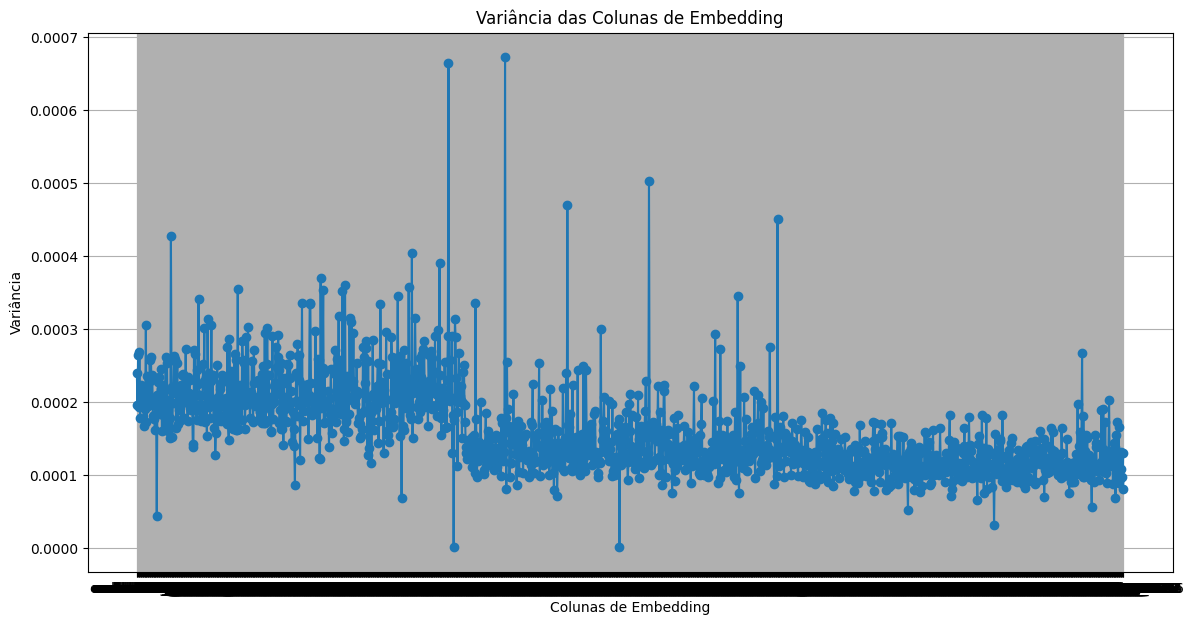

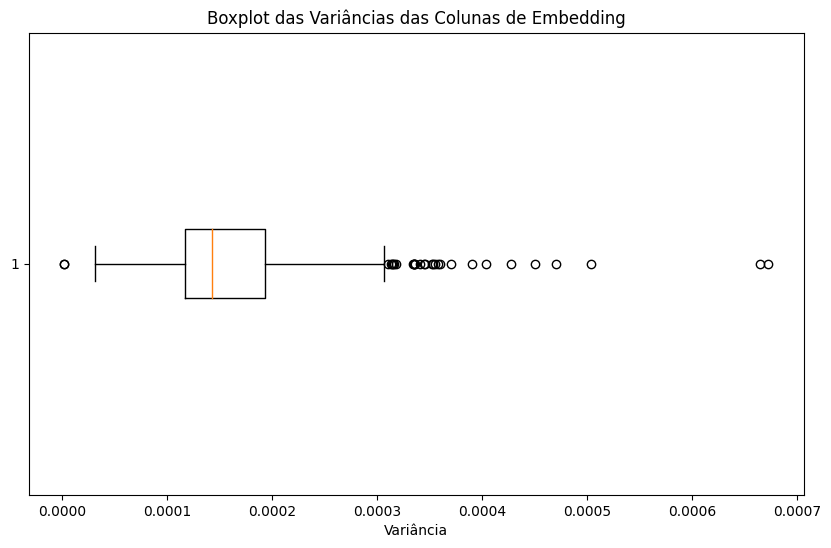

In [95]:
import matplotlib.pyplot as plt

# Calcular a variância de cada coluna de embedding
variances = df[[f'embedding_{i+1}' for i in range(1536)]].var()

# Plotar as variâncias
plt.figure(figsize=(14, 7))
plt.plot(variances, marker='o')
plt.title('Variância das Colunas de Embedding')
plt.xlabel('Colunas de Embedding')
plt.ylabel('Variância')
plt.grid(True)
plt.show()

# Plotar o boxplot das variâncias
plt.figure(figsize=(10, 6))
plt.boxplot(variances, vert=False)
plt.title('Boxplot das Variâncias das Colunas de Embedding')
plt.xlabel('Variância')
plt.show()


Ver correlação entre as features que vamos selecionar! Se a correlação for muito alta entre elas, são redundantes

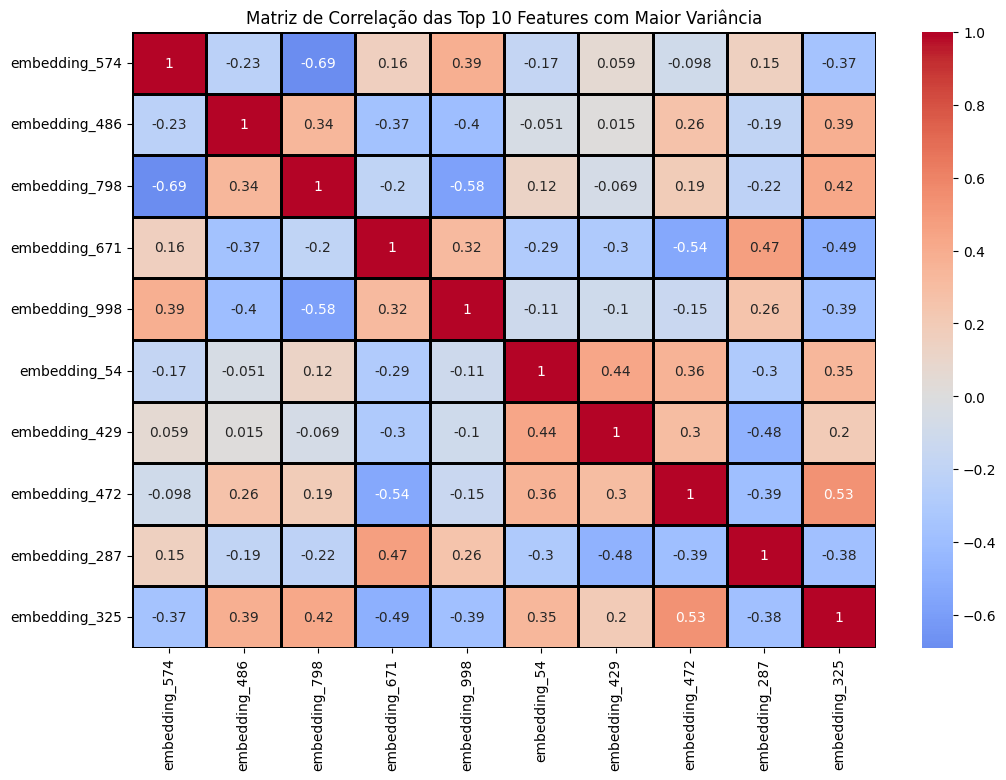

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

N = 10

# Calcular a variância de cada coluna de embedding
variances = df[[f'embedding_{i+1}' for i in range(1536)]].var()

# Selecionar as top 10 colunas com a maior variância
top_N_variances = variances.nlargest(N)

# Filtrar o DF original para manter apenas essas 10 colunas
df_top_features = df[top_N_variances.index]

# Calcular a matriz de correlação
correlation_matrix = df_top_features.corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title(f'Matriz de Correlação das Top {N} Features com Maior Variância')
plt.show()


A maior correlação deu |x| = 0.7
Não são redundantes

mudando colunas str

In [100]:
import re

# Remover a coluna 'Transcrição' (não vai ser útil)
df = df.drop(columns=['Transcrição'])

# Transformar a coluna 'audio_id', removendo o prefixo 'M_' e outros caracteres não numéricos, e convertendo para int
df['audio_id'] = df['audio_id'].apply(lambda x: int(re.sub(r'\D', '', x)))

# Definir X e y
X = df.drop(columns=['Nota Final 2'])  # Exclui a coluna alvo
y = df['Nota Final 2']  # A coluna alvo



colunas com maiores variâncias

In [101]:
top_10_embeddings = [
    'embedding_574', 'embedding_486', 'embedding_798',
    'embedding_671', 'embedding_998', 'embedding_54',
    'embedding_429', 'embedding_472', 'embedding_287', 'embedding_325'
]

Retirando a coluna do id do áudio para não influenciar

In [102]:
df = df.drop(columns=['audio_id'])

### **Cross Validation e Regressão Linear**

In [103]:
from sklearn.model_selection import train_test_split, KFold
import statsmodels.api as sm

# Dividir os dados em treino (75%) e validação (25%)
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Configurar o número de folds para validação cruzada usando apenas os 75% de treino
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Preparar para armazenar os coeficientes e R² de cada fold
coefficients_list = []
r2_scores = []  # Para armazenar os valores de R² de cada fold
models = []     # Para armazenar os modelos ajustados

# Loop através dos folds usando os 75% de treino
for train_index, test_index in kf.split(X_train_full):
    X_train, X_test = X_train_full.iloc[train_index], X_train_full.iloc[test_index]
    y_train, y_test = y_train_full.iloc[train_index], y_train_full.iloc[test_index]

    # Ajustar o modelo de regressão linear
    model = sm.OLS(y_train, X_train).fit()
    models.append(model)  # Armazenar o modelo ajustado

    # Armazenar os coeficientes
    coefficients_list.append(model.params)

    # Calcular e armazenar o R² para o conjunto de teste
    y_test_pred = model.predict(X_test)
    r2 = sm.OLS(y_test, y_test_pred).fit().rsquared
    r2_scores.append(r2)

# Converter listas em DataFrames
coefficients_df = pd.DataFrame(coefficients_list)

# Calcular as médias dos coeficientes ao longo dos folds
mean_coefficients = coefficients_df.mean()

# Resultados
for embedding in top_10_embeddings:
    print(f'Embedding: {embedding}, Coeficiente Médio: {mean_coefficients[embedding]:.4f}')

# Exibir o R-squared médio
print(f'R-squared Médio: {np.mean(r2_scores):.4f}')


Embedding: embedding_574, Coeficiente Médio: 0.0228
Embedding: embedding_486, Coeficiente Médio: 0.0236
Embedding: embedding_798, Coeficiente Médio: -0.0187
Embedding: embedding_671, Coeficiente Médio: -0.0134
Embedding: embedding_998, Coeficiente Médio: -0.0127
Embedding: embedding_54, Coeficiente Médio: -0.0308
Embedding: embedding_429, Coeficiente Médio: -0.0480
Embedding: embedding_472, Coeficiente Médio: 0.0174
Embedding: embedding_287, Coeficiente Médio: 0.0220
Embedding: embedding_325, Coeficiente Médio: 0.0090
R-squared Médio: 0.9497


In [104]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# X_train e y_train já estão definidos
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
models = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    y_val_pred = model.predict(X_val_fold)
    r2 = r2_score(y_val_fold, y_val_pred)
    r2_scores.append(r2)
    models.append(model)


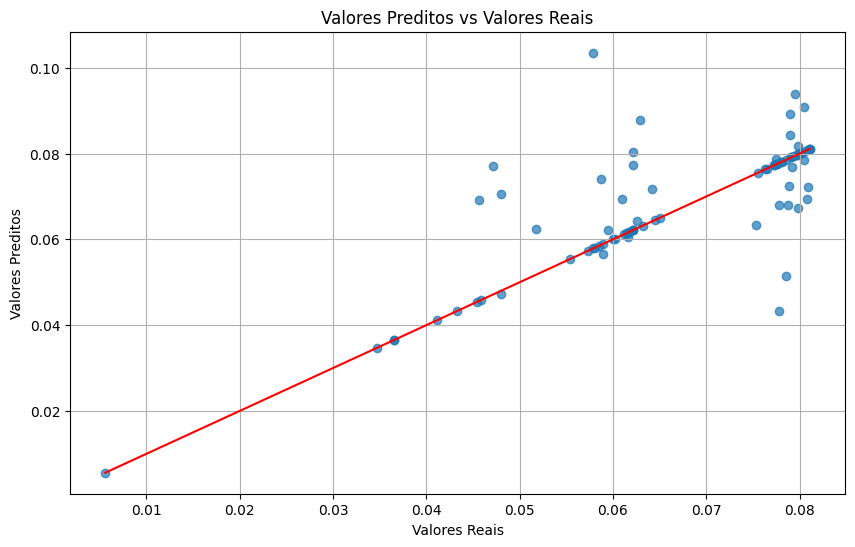

R² para o conjunto de teste: 0.9785


In [107]:
# Identificar o fold com o maior R²
best_fold = np.argmax(r2_scores)  # Encontra o índice do maior R²
best_model = models[best_fold]    # Seleciona o modelo correspondente ao melhor R²

# Fazer predições no conjunto de teste correspondente ao melhor fold
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

y_test_pred = best_model.predict(X_test)

# Plotar valores preditos versus valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Linha de identidade
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Preditos vs Valores Reais')
plt.grid(True)
plt.show()

# Calcular o R² para o conjunto de teste final
final_r2 = sm.OLS(y_test, y_test_pred).fit().rsquared
print(f"R² para o conjunto de teste: {final_r2:.4f}")


Validação final

R-squared na validação: 0.0628


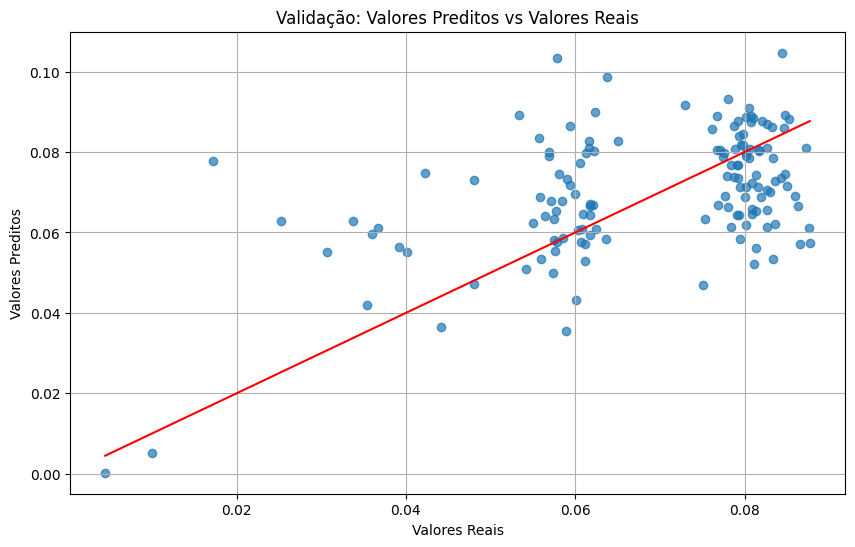

In [109]:
# Selecionar o melhor modelo do cross-validation com o maior R²
best_fold = np.argmax(r2_scores)  # Encontra o índice do maior R²
best_model = models[best_fold]    # Seleciona o modelo correspondente ao melhor R²

# Fazer predições no conjunto de validação (25% dos dados que foram separados)
y_val_pred = best_model.predict(X_val)

# Calcular o R² para o conjunto de validação
r2_val = r2_score(y_val, y_val_pred)

# Exibir o R-squared para o conjunto de validação
print(f'R-squared na validação: {r2_val:.4f}')

# Comparar os valores preditos com os valores reais
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Linha de identidade
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Validação: Valores Preditos vs Valores Reais')
plt.grid(True)
plt.show()


### **Cross Validation e Regressão Linear com os top 10 embeddings**

In [110]:
from sklearn.model_selection import train_test_split, KFold
import statsmodels.api as sm

X_train_full, X_val, y_train_full, y_val = train_test_split(X[top_10_embeddings], y, test_size=0.25, random_state=42)

# Configurar o número de folds para validação cruzada usando apenas os 75% de treino
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Preparar para armazenar os coeficientes e R² de cada fold
coefficients_list = []
r2_scores = []  # Para armazenar os valores de R² de cada fold
models = []     # Para armazenar os modelos ajustados

# Loop através dos folds usando os 75% de treino
for train_index, test_index in kf.split(X_train_full):
    X_train, X_test = X_train_full.iloc[train_index], X_train_full.iloc[test_index]
    y_train, y_test = y_train_full.iloc[train_index], y_train_full.iloc[test_index]

    # Ajustar o modelo de regressão linear
    model = sm.OLS(y_train, X_train).fit()
    models.append(model)  # Armazenar o modelo ajustado

    # Armazenar os coeficientes
    coefficients_list.append(model.params)

    # Calcular e armazenar o R² para o conjunto de teste
    y_test_pred = model.predict(X_test)
    r2 = sm.OLS(y_test, y_test_pred).fit().rsquared
    r2_scores.append(r2)

# Converter listas em DataFrames
coefficients_df = pd.DataFrame(coefficients_list)

# Calcular as médias dos coeficientes ao longo dos folds
mean_coefficients = coefficients_df.mean()

# Resultados
for embedding in top_10_embeddings:
    print(f'Embedding: {embedding}, Coeficiente Médio: {mean_coefficients[embedding]:.4f}')

# Exibir o R-squared médio
print(f'R-squared Médio: {np.mean(r2_scores):.4f}')


Embedding: embedding_574, Coeficiente Médio: 0.0049
Embedding: embedding_486, Coeficiente Médio: 0.0185
Embedding: embedding_798, Coeficiente Médio: -0.1204
Embedding: embedding_671, Coeficiente Médio: -0.0203
Embedding: embedding_998, Coeficiente Médio: -0.2299
Embedding: embedding_54, Coeficiente Médio: 0.1386
Embedding: embedding_429, Coeficiente Médio: -0.3667
Embedding: embedding_472, Coeficiente Médio: 0.0234
Embedding: embedding_287, Coeficiente Médio: -0.0099
Embedding: embedding_325, Coeficiente Médio: -0.0834
R-squared Médio: 0.9582


In [111]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# X_train e y_train já estão definidos
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
models = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    y_val_pred = model.predict(X_val_fold)
    r2 = r2_score(y_val_fold, y_val_pred)
    r2_scores.append(r2)
    models.append(model)


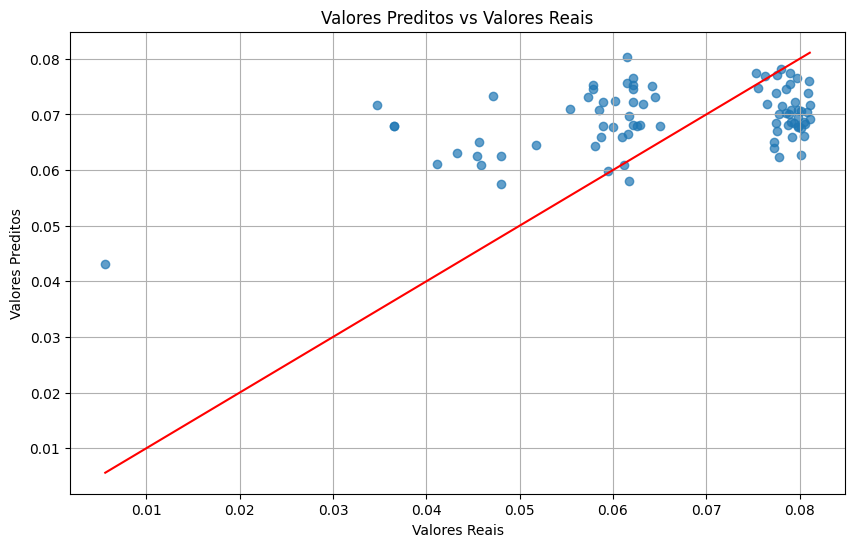

R² para o conjunto de teste: 0.9637


In [112]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train = X[top_10_embeddings]
y_train = y

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
models = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    y_val_pred = model.predict(X_val_fold)
    r2 = r2_score(y_val_fold, y_val_pred)
    r2_scores.append(r2)
    models.append(model)

# Identificar o fold com o maior R²
best_fold = np.argmax(r2_scores)  # Encontra o índice do maior R²
best_model = models[best_fold]    # Seleciona o modelo correspondente ao melhor R²

# Fazer predições no conjunto de teste correspondente ao melhor fold
X_train, X_test = X.iloc[train_index][top_10_embeddings], X.iloc[test_index][top_10_embeddings]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

y_test_pred = best_model.predict(X_test)

# Plotar valores preditos versus valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Linha de identidade
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Preditos vs Valores Reais')
plt.grid(True)
plt.show()

# Calcular o R² para o conjunto de teste final
final_r2 = sm.OLS(y_test, y_test_pred).fit().rsquared
print(f"R² para o conjunto de teste: {final_r2:.4f}")


R-squared na validação: 0.2201


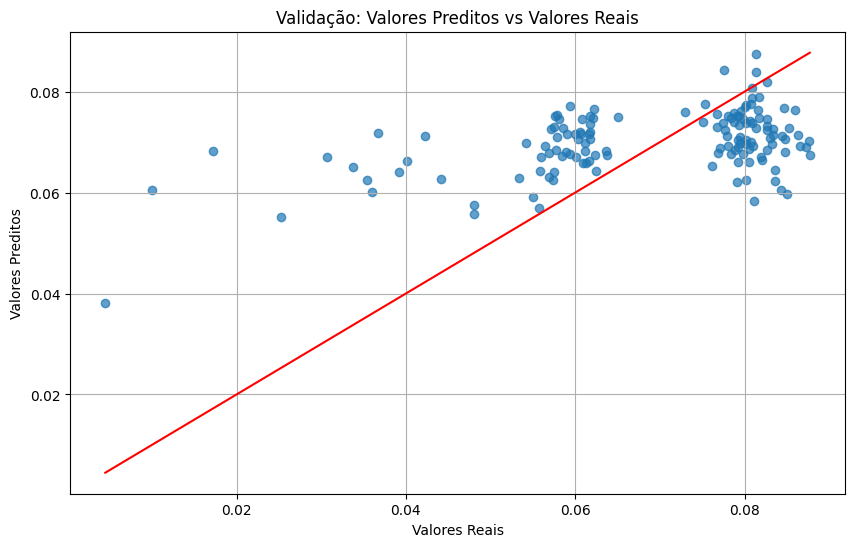

In [113]:
# Selecionar o melhor modelo do cross-validation com o maior R²
best_fold = np.argmax(r2_scores)  # Encontra o índice do maior R²
best_model = models[best_fold]    # Seleciona o modelo correspondente ao melhor R²

# Fazer predições no conjunto de validação (25% dos dados que foram separados)
y_val_pred = best_model.predict(X_val[top_10_embeddings])

# Calcular o R² para o conjunto de validação
r2_val = r2_score(y_val, y_val_pred)

# Exibir o R-squared para o conjunto de validação
print(f'R-squared na validação: {r2_val:.4f}')

# Comparar os valores preditos com os valores reais
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Linha de identidade
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Validação: Valores Preditos vs Valores Reais')
plt.grid(True)
plt.show()
